## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten
import cv2

Using TensorFlow backend.


## Retrieving the images and Data Augumentation

In [2]:
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                              zoom_range=0.3, 
                              vertical_flip=True  )

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory(r"D:\Education\Education\Data Science\Datasets\archive\chest_xray\chest_xray\train",
                                         target_size=(64,64),
                                         batch_size=32,
                                         class_mode='binary')

Found 5216 images belonging to 2 classes.


In [6]:
x_test=test_datagen.flow_from_directory(r"D:\Education\Education\Data Science\Datasets\archive\chest_xray\chest_xray\test", 
                                        target_size=(64,64), 
                                        batch_size=32, 
                                        class_mode='binary')

Found 624 images belonging to 2 classes.


In [7]:
x_train.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

## Visualizing training images

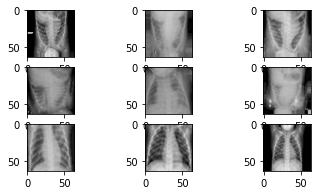

In [8]:
for i,image in enumerate(x_train,1):
    if(i==10):
        break
        
    plt.subplot(4,3,i)
    plt.imshow(image[0][0])

In [9]:
len(x_train)

163

In [10]:
len(x_test)

20

# Building the neural network architecture

### -> Adding several convolution-pooling layer pairs before eventually being flattened and connected to dense layers. 

In [11]:
from keras.regularizers import l1
from keras.regularizers import l2
reg=keras.regularizers.l1_l2(l1=0.1, l2=0.01)

In [12]:
model=Sequential()

In [13]:
model.add(Conv2D(32, (3,3), strides=(1,1), input_shape=(64,64,3), activation="relu"))
model.add(Conv2D(32, (3,3), strides=(1,1), input_shape=(64,64,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

In [14]:
model.add(Conv2D(64, (3,3), strides=(1,1), input_shape=(64,64,3), activation="relu"))
model.add(Conv2D(64, (3,3), strides=(1,1), input_shape=(64,64,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(kernel_initializer="random_uniform", activation="relu", units=300))
model.add(Dense(kernel_initializer="random_uniform", activation="relu", units=300))

In [17]:
model.add(Dense(kernel_initializer="random_uniform", activation="sigmoid", units=1))

In [18]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 55, 55, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)           

In [20]:
history=model.fit(x_train, steps_per_epoch=163, epochs=15, validation_data=x_test, validation_steps=20)


Epoch 1/15
163/163 [==============================] - 322s 2s/step - loss: 0.4560 - accuracy: 0.7968 - val_loss: 0.2353 - val_accuracy: 0.8157
Epoch 2/15
163/163 [==============================] - 321s 2s/step - loss: 0.3638 - accuracy: 0.8420 - val_loss: 0.2927 - val_accuracy: 0.8782
Epoch 3/15
163/163 [==============================] - 322s 2s/step - loss: 0.2892 - accuracy: 0.8779 - val_loss: 0.6270 - val_accuracy: 0.8221
Epoch 4/15
163/163 [==============================] - 311s 2s/step - loss: 0.2552 - accuracy: 0.8936 - val_loss: 0.5305 - val_accuracy: 0.8205
Epoch 5/15
163/163 [==============================] - 317s 2s/step - loss: 0.2362 - accuracy: 0.8988 - val_loss: 0.8079 - val_accuracy: 0.8734
Epoch 6/15
163/163 [==============================] - 312s 2s/step - loss: 0.2207 - accuracy: 0.9076 - val_loss: 0.6656 - val_accuracy: 0.8590
Epoch 7/15
163/163 [==============================] - 311s 2s/step - loss: 0.1974 - accuracy: 0.9179 - val_loss: 0.2615 - val_accuracy: 0.905

In [21]:
model.save("pnemo.h5")

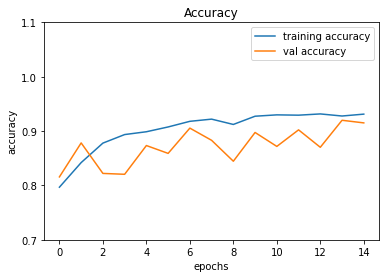

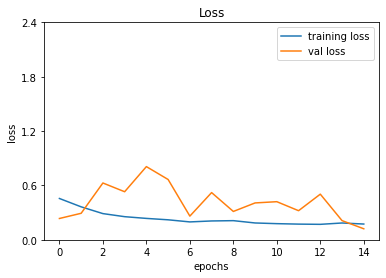

In [24]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.xticks(np.arange(0, 16, 2))
plt.yticks(np.arange(0.7, 1.2, 0.1))
plt.legend()
plt.show()

#plotting graphs for loss 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.xticks(np.arange(0, 16, 2))
plt.yticks(np.arange(0, 2.5, 0.6))
plt.legend()
plt.show()